In [1]:
from sklearn.datasets import make_classification

In [2]:
x,y = make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90], random_state=12, n_redundant=0)

In [3]:
import pandas as pd

df1 = pd.DataFrame(x,columns=["f1","f2"])
df2 = pd.DataFrame(y, columns=["target"])

df1



,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206
...,...,...
995,-0.712495,-0.880452
996,-2.625830,-2.827891
997,-1.326439,-1.815178
998,-0.833486,-0.514647


In [4]:
df2

,target
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [ ]:
final_df = pd.concat([df1,df2], axis=1)
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [6]:
final_df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

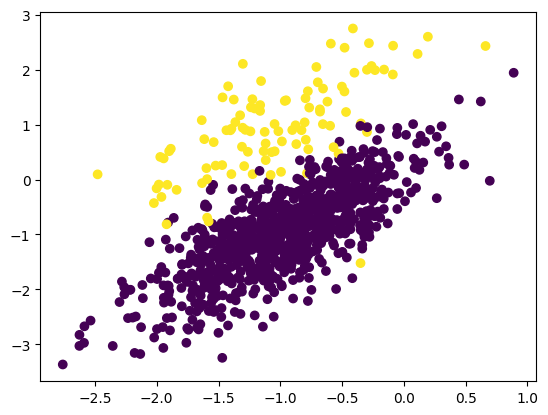

In [7]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [8]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE oversampler
oversample = SMOTE()

# Apply SMOTE to the dataset
X_resampled, y_resampled = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [9]:
X_resampled

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206
...,...,...
1795,-0.131234,2.446619
1796,0.005398,1.977580
1797,-1.999740,-0.231719
1798,-1.239280,1.211956


In [10]:
y_resampled

0       0
1       0
2       0
3       1
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int32

In [11]:
final = pd.concat([X_resampled,y_resampled],axis=1)
final['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

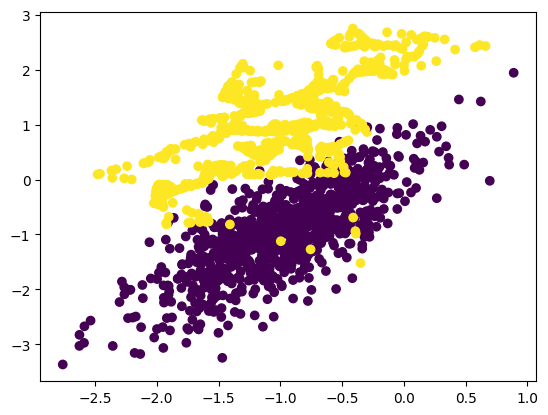

In [12]:
plt.scatter(final['f1'],final['f2'],c=final['target'])